In [ ]:
!pip install tensorflow


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.metrics import Accuracy
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Load and preprocess the dataset
df = pd.read_csv(r'/content/Heart_Disease_Prediction.csv')

In [ ]:
df

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,Absence
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,Absence
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,Absence
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,Absence


In [ ]:
df['Sex'].value_counts()

1    183
0     87
Name: Sex, dtype: int64

<Axes: xlabel='Sex', ylabel='count'>

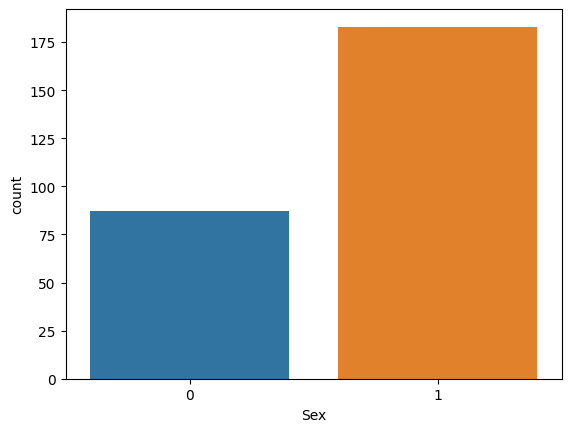

In [ ]:
sns.countplot(x='Sex', data=df)

In [ ]:
df['Heart Disease'].value_counts()

Absence     150
Presence    120
Name: Heart Disease, dtype: int64

<Axes: xlabel='Heart Disease', ylabel='count'>

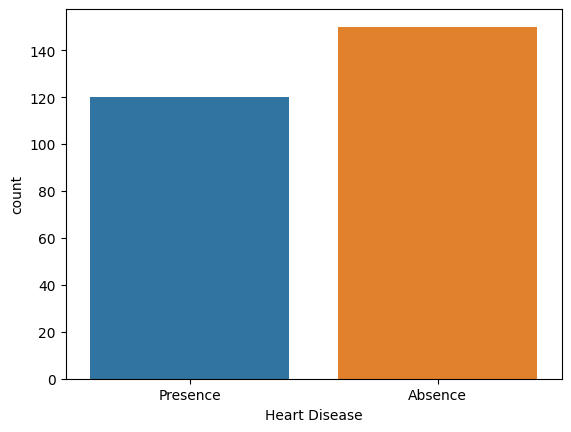

In [ ]:
sns.countplot(x='Heart Disease', data=df)

In [ ]:
#data =  pd.get_dummies(data = df, columns = ['Heart Disease'])

In [ ]:
df.columns

Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [ ]:
df['ST depression'] = df['ST depression'].astype(int)

In [ ]:
df.isnull().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [ ]:
X

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
0,70,1,4,130,322,0,2,109,0,2,2,3,3
1,67,0,3,115,564,0,2,160,0,1,2,0,7
2,57,1,2,124,261,0,0,141,0,0,1,0,7
3,64,1,4,128,263,0,0,105,1,0,2,1,7
4,74,0,2,120,269,0,2,121,1,0,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0,1,0,7
266,44,1,2,120,263,0,0,173,0,0,1,0,7
267,56,0,2,140,294,0,2,153,0,1,2,0,3
268,57,1,4,140,192,0,0,148,0,0,2,0,6


In [ ]:
corr_ = df.corr()

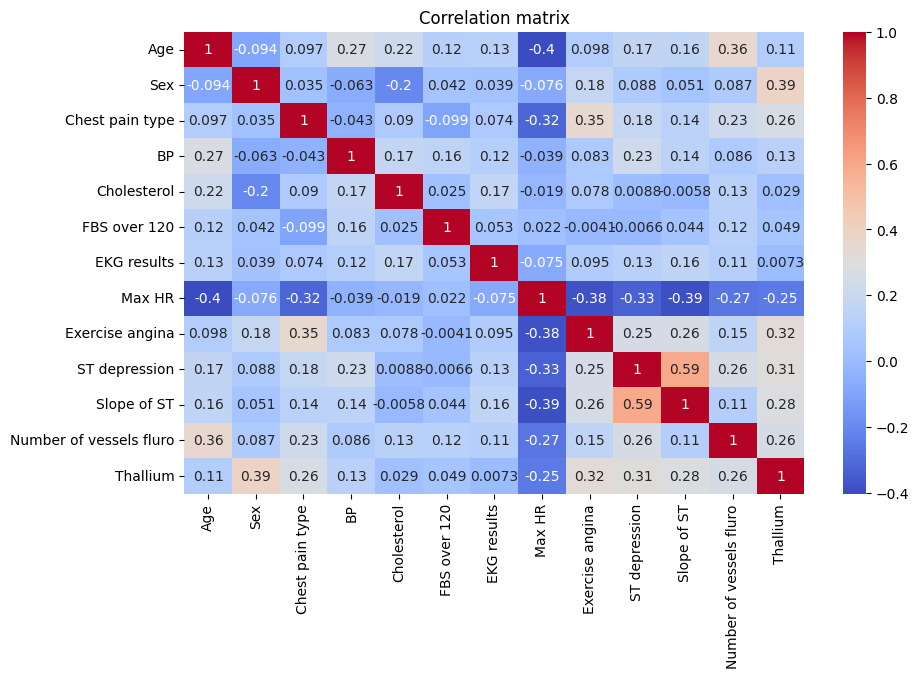

In [ ]:
plt.figure(figsize = (10,6))
sns.heatmap(corr_, annot=True, cmap = 'coolwarm')
plt.title('Correlation matrix')
plt.show()

In [ ]:
# Splitting the dataset into training and testing sets.
x = df.iloc[:, :-2]
y = df.iloc[:, -1]

In [ ]:
x

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro
0,70,1,4,130,322,0,2,109,0,2,2,3
1,67,0,3,115,564,0,2,160,0,1,2,0
2,57,1,2,124,261,0,0,141,0,0,1,0
3,64,1,4,128,263,0,0,105,1,0,2,1
4,74,0,2,120,269,0,2,121,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0,1,0
266,44,1,2,120,263,0,0,173,0,0,1,0
267,56,0,2,140,294,0,2,153,0,1,2,0
268,57,1,4,140,192,0,0,148,0,0,2,0


In [ ]:
y

0      Presence
1       Absence
2      Presence
3       Absence
4       Absence
         ...   
265     Absence
266     Absence
267     Absence
268     Absence
269    Presence
Name: Heart Disease, Length: 270, dtype: object

# **Spliting Dataset**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0, test_size = 0.35)

# **Standardization Scale**

In [ ]:
# Using standard scaler as a standardization technique.
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

# **Encoded**

# **RF classifier**

In [ ]:
rf = RandomForestClassifier(n_estimators=500, random_state=12, max_depth=5)
rf.fit(x_train,y_train)
rf_predicted = rf.predict(x_test)

In [ ]:
rf_conf_matrix = confusion_matrix(y_test, rf_predicted)
print("confusion matrix")
print(rf_conf_matrix)

confusion matrix
[[44 11]
 [ 6 34]]


In [ ]:
rf_acc_score = accuracy_score(y_test, rf_predicted)
print("Accuracy of Random Forest:",rf_acc_score*100)

Accuracy of Random Forest: 82.10526315789474


# **Tensorflow**

In [ ]:
# Load and preprocess the dataset)
X = df.drop('Heart Disease', axis=1)
y = df['Heart Disease']

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Perform label encoding on the target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [ ]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Scale the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Create a neural network model
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=[Accuracy()])

In [ ]:
# Train the model
model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, verbose=1)

Epoch 1/10
7/7 [==============================] - 2s 6ms/step - loss: 0.6671 - accuracy: 0.0000e+00
Epoch 2/10
7/7 [==============================] - 0s 4ms/step - loss: 0.5566 - accuracy: 0.0000e+00
Epoch 3/10
7/7 [==============================] - 0s 4ms/step - loss: 0.4798 - accuracy: 0.0000e+00
Epoch 4/10
7/7 [==============================] - 0s 4ms/step - loss: 0.4312 - accuracy: 0.0000e+00
Epoch 5/10
7/7 [==============================] - 0s 5ms/step - loss: 0.3979 - accuracy: 0.0000e+00
Epoch 6/10
7/7 [==============================] - 0s 4ms/step - loss: 0.3761 - accuracy: 0.0000e+00
Epoch 7/10
7/7 [==============================] - 0s 8ms/step - loss: 0.3603 - accuracy: 0.0000e+00
Epoch 8/10
7/7 [==============================] - 0s 8ms/step - loss: 0.3483 - accuracy: 0.0000e+00
Epoch 9/10
7/7 [==============================] - 0s 9ms/step - loss: 0.3390 - accuracy: 0.0000e+00
Epoch 10/10
7/7 [==============================] - 0s 7ms/step - loss: 0.3303 - accuracy: 0.0000e+00

In [ ]:
# Evaluate the model
_, accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Accuracy: {accuracy}")

2/2 [==============================] - 1s 7ms/step - loss: 0.2967 - accuracy: 0.0000e+00
Accuracy: 0.0


In [ ]:
# Make predictions
new_data = pd.read_csv('/content/Heart_Disease_Prediction.csv')
new_data_scaled = scaler.transform(new_data)
predictions = model.predict(new_data_scaled)
print(f"Predictions: {predictions}")

ValueError: ignored